# My First CNN on MNIST
---
## 일단 Quick 하게

코드는 정말 수루룩 끝난다!

그래서 다시 한 번! 아래 그림을 보고 구조를 확실히 추적할 수 있어야 한다.

* [Ex1](https://cdn-images-1.medium.com/max/1600/1*O9ulXVmjBustHGLi1zRthA.png)
* [Ex2](https://cdn-images-1.medium.com/max/1600/1*jqKHgwZ8alM3K_JRYO_l4w.png)



### 라이브러리 로딩

In [1]:
'''
라이브러리들을 불러오자.
'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import random as rd
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow import keras

In [2]:
(train_x, train_y), (test_x, test_y) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [3]:
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


id = 9385
다음 그림은 숫자 8 입니다.


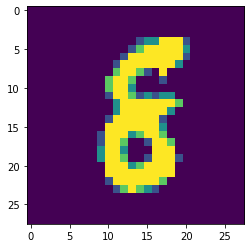

In [4]:
'''
Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

id = rd.randrange(0, 10000)

print(f'id = {id}')
print(f'다음 그림은 숫자 {test_y[id]} 입니다.')
plt.imshow(test_x[id])
plt.show()

### Convolutional Layer를 사용하기 위한 reshape!

- **채널이 추가되어야 한다**

In [5]:
train_x.shape, test_x.shape

((60000, 28, 28), (10000, 28, 28))

In [6]:
_, h, w = train_x.shape

print(h, w)

28 28


In [7]:
train_x = train_x.reshape(train_x.shape[0], h, w, 1)
test_x = test_x.reshape(test_x.shape[0], h, w, 1)

print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)

(60000, 28, 28, 1) (60000,) (10000, 28, 28, 1) (10000,)


* 이미지가 0 ~ 1 사이 값을 갖도록 스케일 조정!

In [8]:
print(f'max : {train_x.max()} , min : {train_x.min()}')

max : 255 , min : 0


In [9]:
max_num = train_x.max()

train_x = train_x/max_num
test_x = test_x/max_num

In [10]:
print(f'max : {train_x.max()} , min : {train_x.min()}')

max : 1.0 , min : 0.0


## Sequential API로 모델링

CNN에 관한 것만 추가가 된다.
[여기](https://keras.io/layers/convolutional/)를 적극적으로 참고하자

In [11]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.backend import clear_session
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPool2D

In [12]:
# 혹시 이미 그려둔 그래프가 있다면 날려줘!
clear_session()

# model에 순차적으로 레이어를 쌓아가겠다는 의도!
model = Sequential()

# 인풋 레이어부터 레이어 블록을 하나하나 쌓는다!
model.add( Input(shape=(28, 28, 1)) )

model.add( Conv2D(filters=16, padding='same',
                  kernel_size=(3, 3),
                  activation='relu') )

model.add( MaxPool2D(pool_size=(2, 2)) )

model.add( Conv2D(filters=32,
                         kernel_size=(3, 3),
                         activation='relu') )

model.add( Flatten() )
model.add( Dense(64, activation='relu') )
model.add( Dense(10, activation='softmax'))

# 컴파일!
model.compile(loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'],
              optimizer='adam' )

# 양념!
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 32)        4640      
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 64)                294976    
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                        

In [13]:
# 데이터를 넣어서 학습시키자!
hist = model.fit(train_x, train_y, epochs=15, batch_size=1024,
                 validation_split=0.2, verbose=1)

Epoch 1/15
47/47 [==============================] - 14s 26ms/step - loss: 0.7077 - accuracy: 0.8118 - val_loss: 0.2560 - val_accuracy: 0.9279
Epoch 2/15
47/47 [==============================] - 1s 11ms/step - loss: 0.2216 - accuracy: 0.9347 - val_loss: 0.1576 - val_accuracy: 0.9549
Epoch 3/15
47/47 [==============================] - 1s 11ms/step - loss: 0.1344 - accuracy: 0.9600 - val_loss: 0.1027 - val_accuracy: 0.9712
Epoch 4/15
47/47 [==============================] - 1s 11ms/step - loss: 0.0911 - accuracy: 0.9732 - val_loss: 0.0777 - val_accuracy: 0.9781
Epoch 5/15
47/47 [==============================] - 1s 11ms/step - loss: 0.0705 - accuracy: 0.9793 - val_loss: 0.0691 - val_accuracy: 0.9805
Epoch 6/15
47/47 [==============================] - 1s 11ms/step - loss: 0.0565 - accuracy: 0.9834 - val_loss: 0.0649 - val_accuracy: 0.9811
Epoch 7/15
47/47 [==============================] - 0s 11ms/step - loss: 0.0492 - accuracy: 0.9850 - val_loss: 0.0519 - val_accuracy: 0.9849
Epoch 8/15
4

KeyboardInterrupt: ignored

In [ ]:
performance_test = model.evaluate(test_x, test_y, batch_size=100)

print(f'Test Loss : {performance_test[0]:.6f} |  Test Accuracy : {performance_test[1]*100:.2f}%')

In [ ]:
if not isinstance(hist, dict) :
    history = hist.history

plt.figure(figsize=(10, 5))
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Accuracy : Training vs Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc=0)
plt.show()

In [ ]:
if not isinstance(hist, dict) :
    history = hist.history

plt.figure(figsize=(10, 5))
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Loss : Training vs Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc=0)
plt.show()

* 예측값 생성

In [ ]:
pred_train = model.predict(train_x)
pred_test = model.predict(test_x)

single_pred_train = pred_train.argmax(axis=1)
single_pred_test = pred_test.argmax(axis=1)

logi_train_accuracy = accuracy_score(train_y, single_pred_train)
logi_test_accuracy = accuracy_score(test_y, single_pred_test)

print('CNN')
print(f'트레이닝 정확도 : {logi_train_accuracy*100:.2f}%' )
print(f'테스트 정확도 : {logi_test_accuracy*100:.2f}%' )

## 숫자 이미지 시각화

In [ ]:
'''
성능 확인을 위해
Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

id = rd.randrange(0,10000)

print(f'id = {id}')
print(f'다음 그림은 숫자 {test_y[id]} 입니다.')
print(f'모델의 예측 : {single_pred_test[id]}')
print(f'모델의 카테고리별 확률 : {np.floor(pred_test[id]*100)}')

if test_y[id] == single_pred_test[id] :
    print('정답입니다')
else : 
    print('틀렸어요')
    
plt.imshow(test_x[id].reshape([28,-1]))
plt.show()

In [ ]:
'''
틀린 것만 관찰해보자!

Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

true_false = (test_y==single_pred_test)
f_id = np.where(true_false==False)[0]
f_n = len(f_id)

id = f_id[rd.randrange(0,f_n)]

print(f'id = {id}')
print(f'다음 그림은 숫자 {test_y[id]} 입니다.')
print(f'모델의 예측 : {single_pred_test[id]}')
print(f'모델의 카테고리별 확률 : {np.floor(pred_test[id]*100)}')

if test_y[id] == single_pred_test[id] :
    print('정답입니다')
else : 
    print('틀렸어요')
    
plt.imshow(test_x[id].reshape([28,-1]))
plt.show()